In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications import EfficientNetB7
from keras.applications.efficientnet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive'


MyDrive


In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/xray1/chest_xray/train'
test_path = '/content/drive/MyDrive/xray1/chest_xray/test'

Working with 3883 images
Image examples: 
person540_virus_1070.jpeg


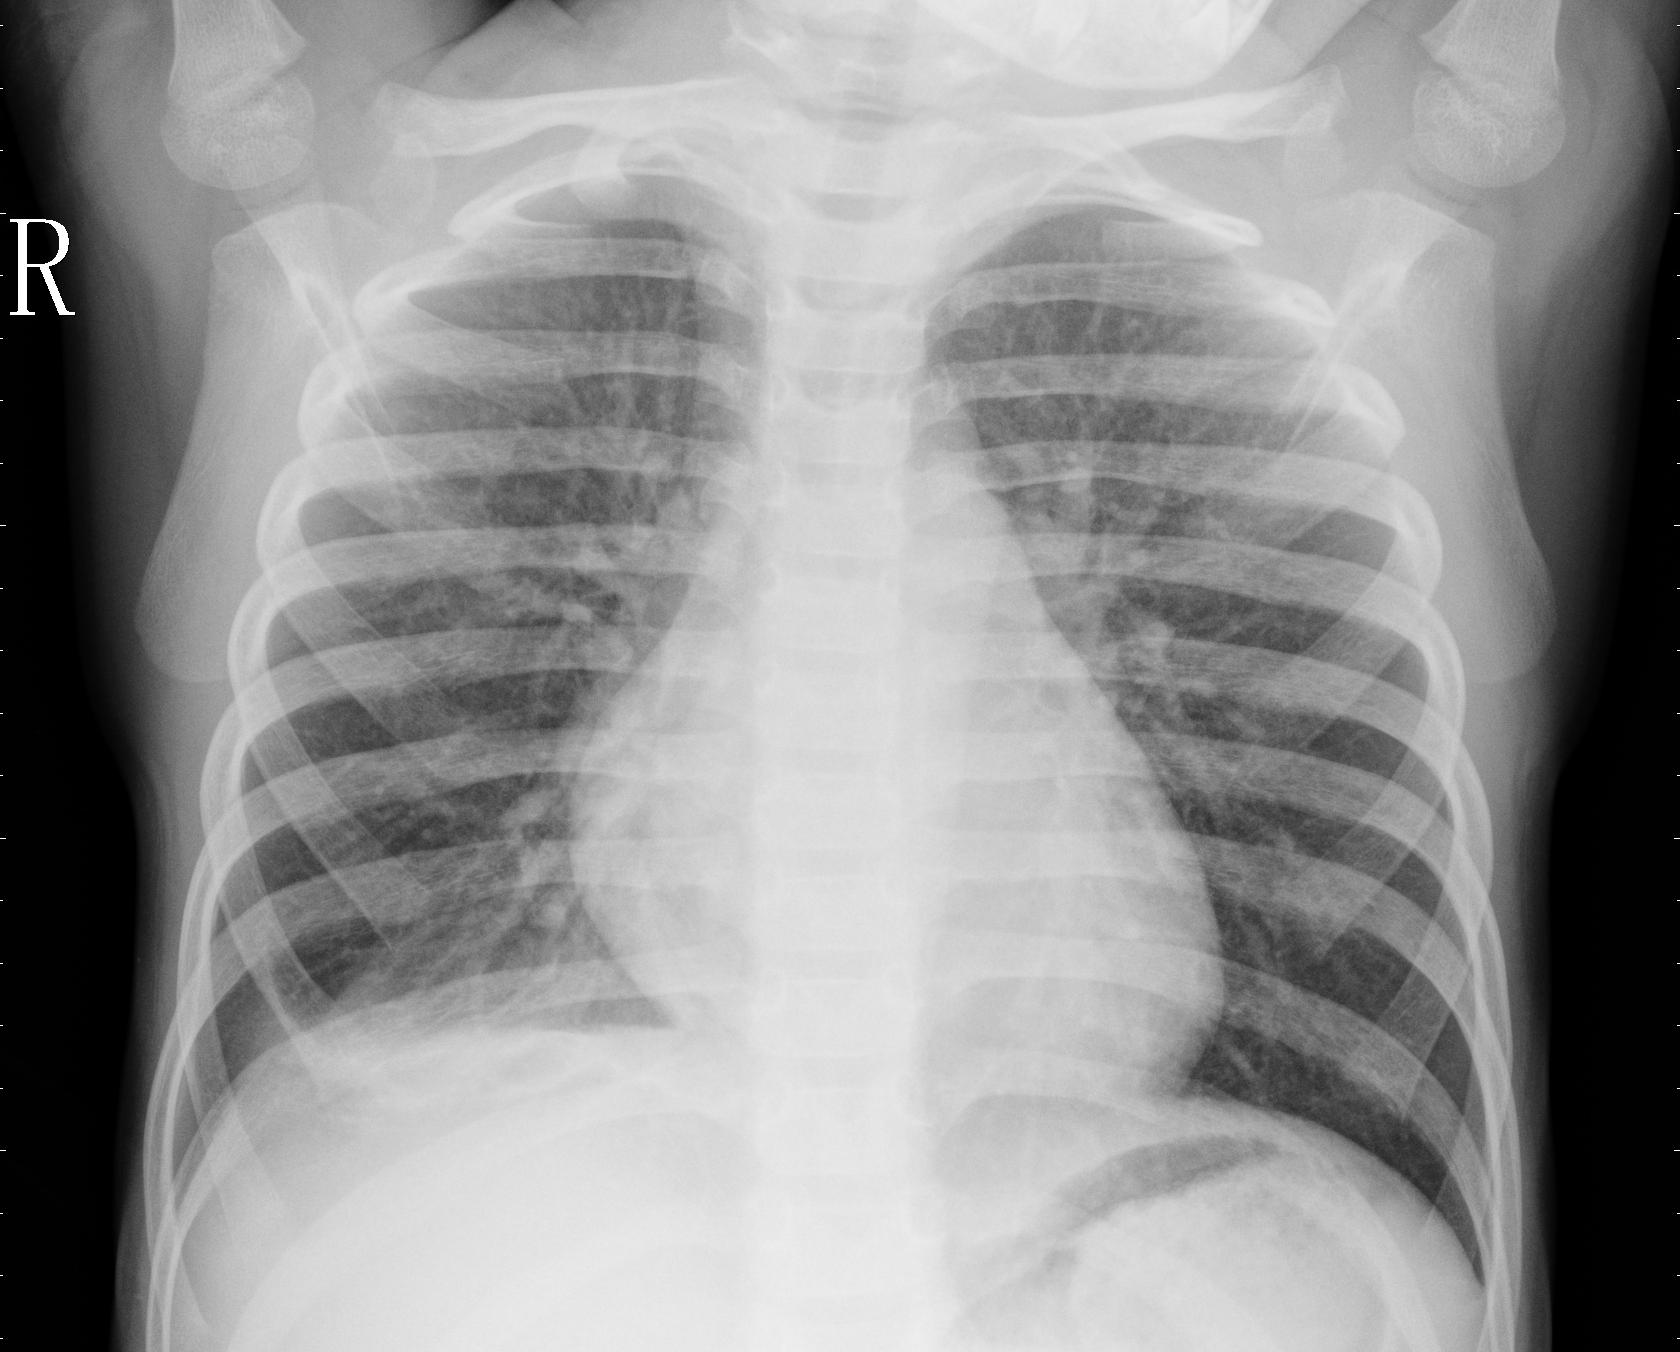

person542_virus_1072.jpeg


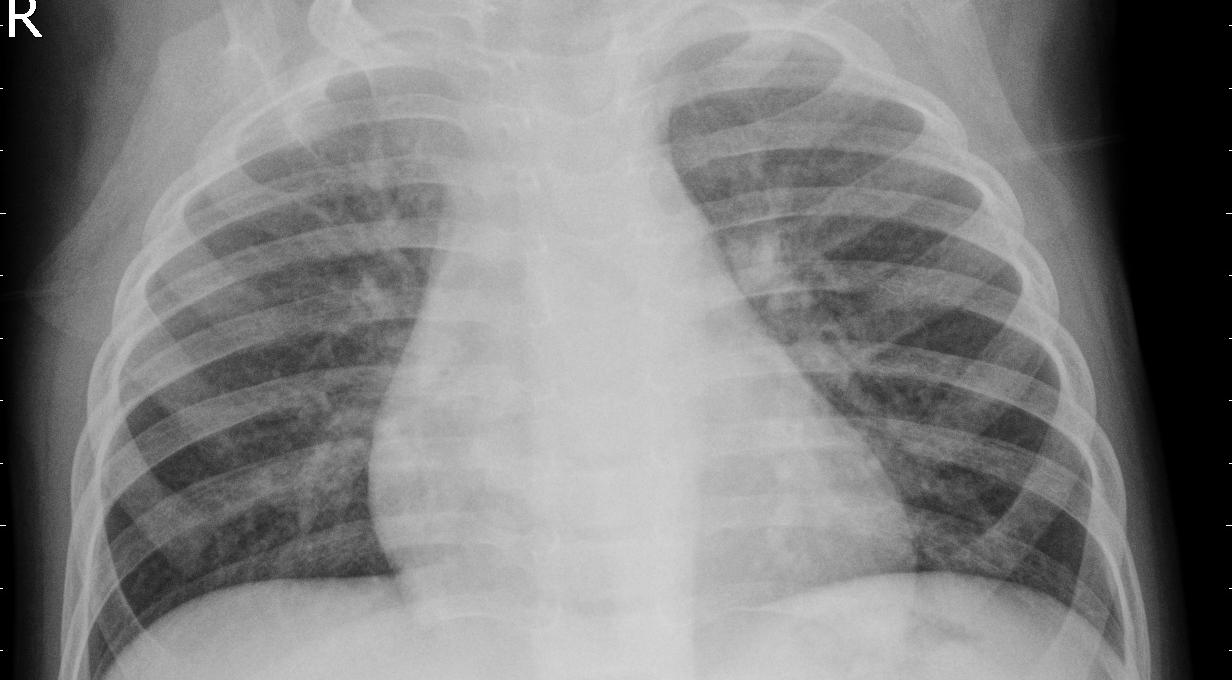

person53_bacteria_254.jpeg


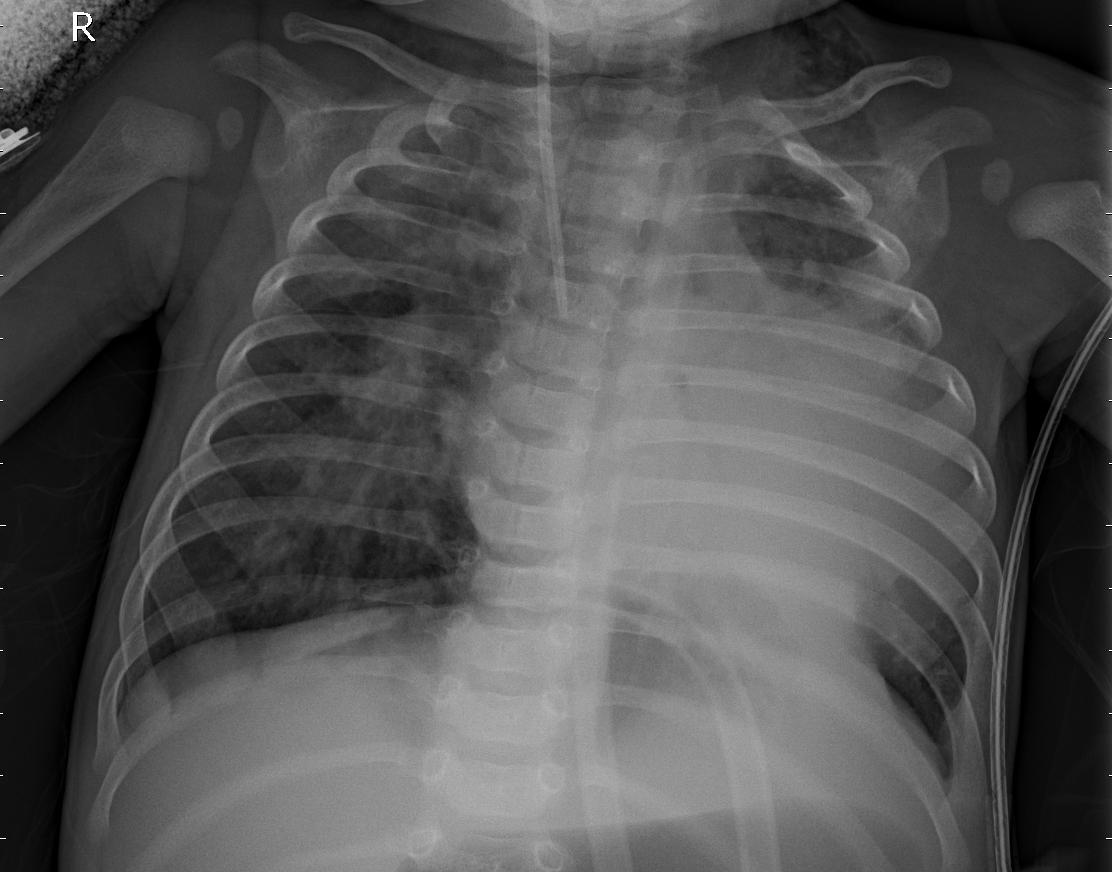

person543_bacteria_2283.jpeg


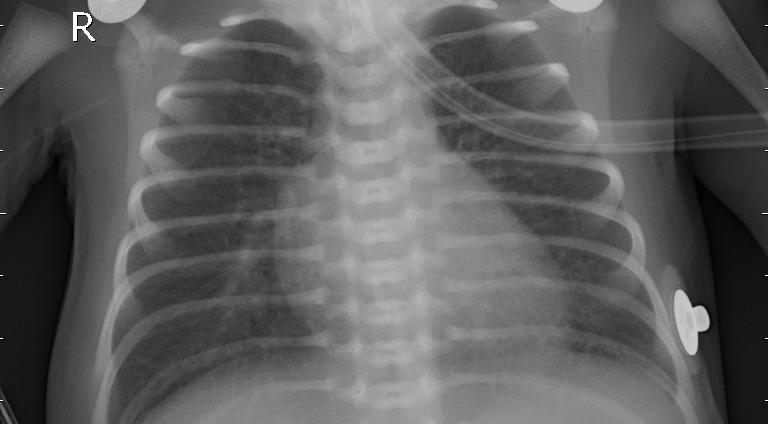

person544_virus_1079.jpeg


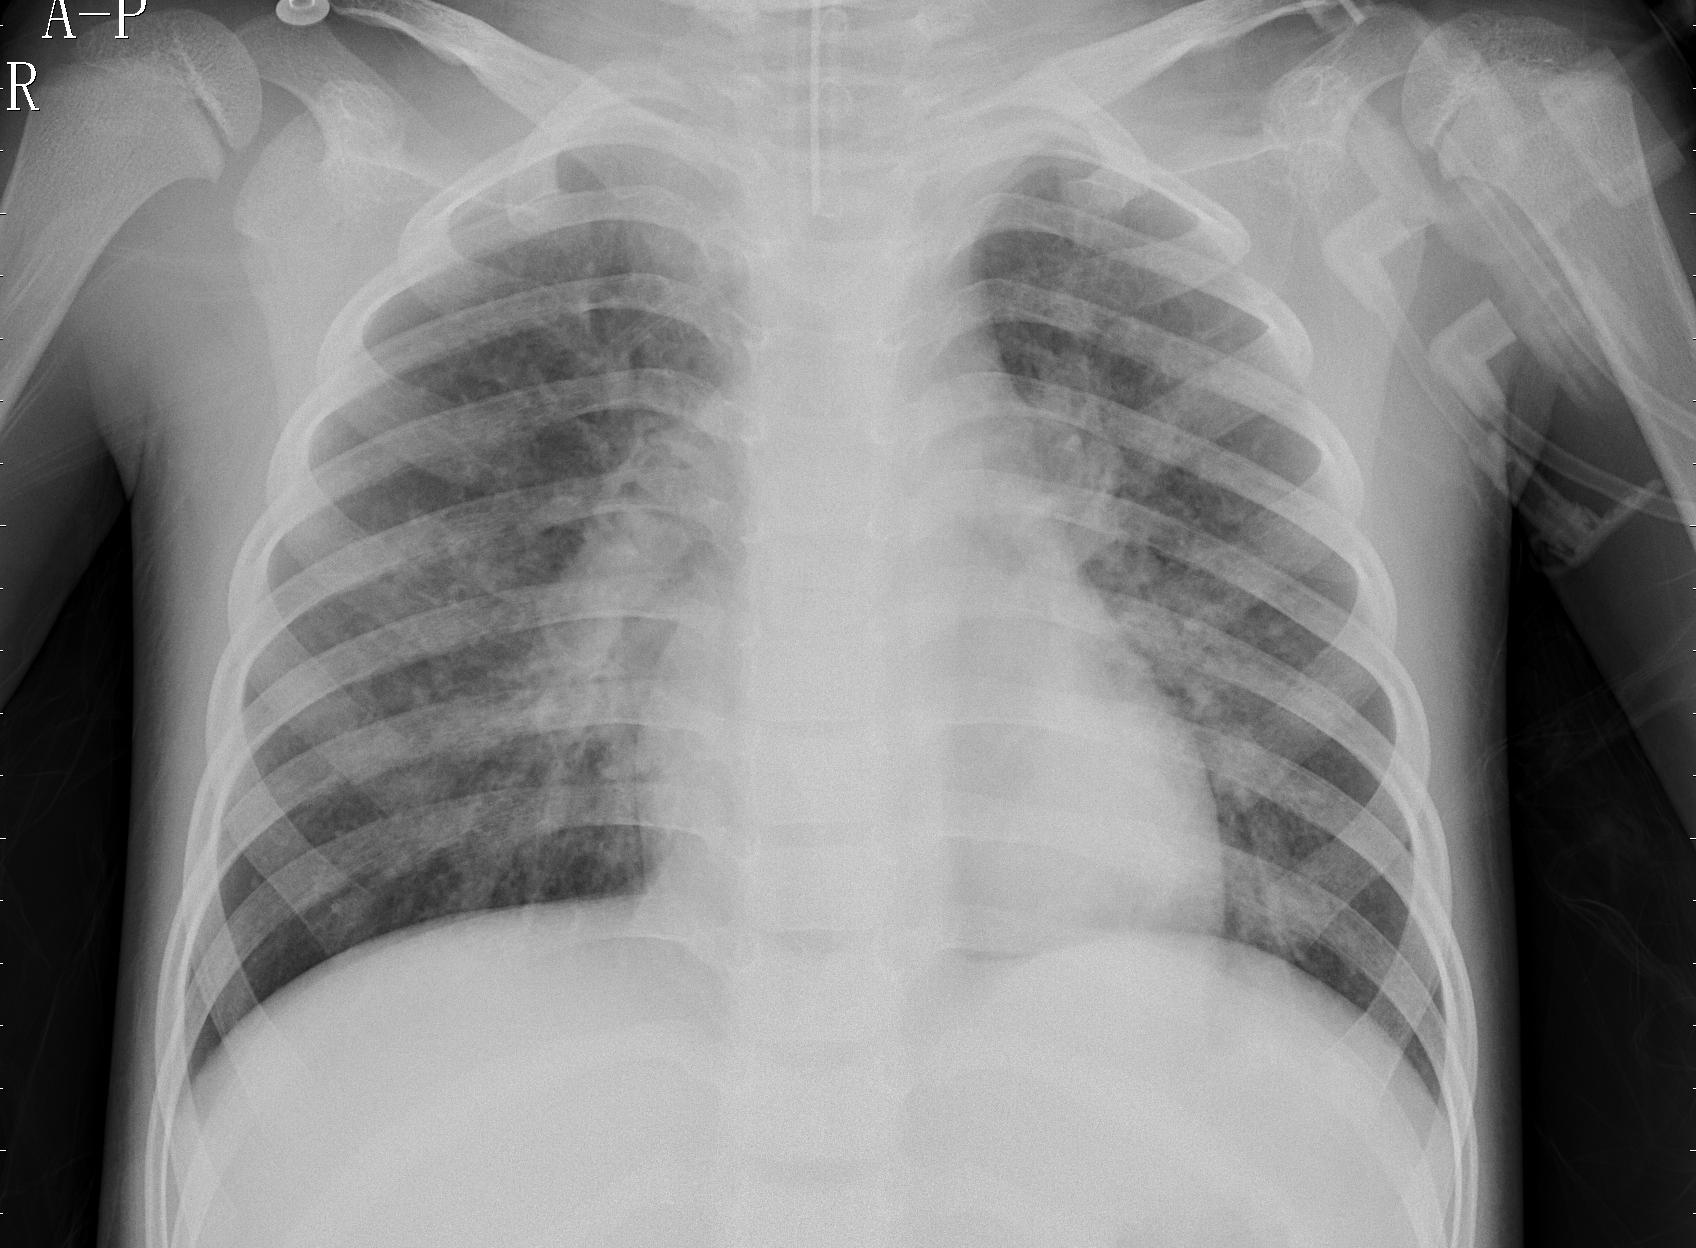

person545_bacteria_2287.jpeg


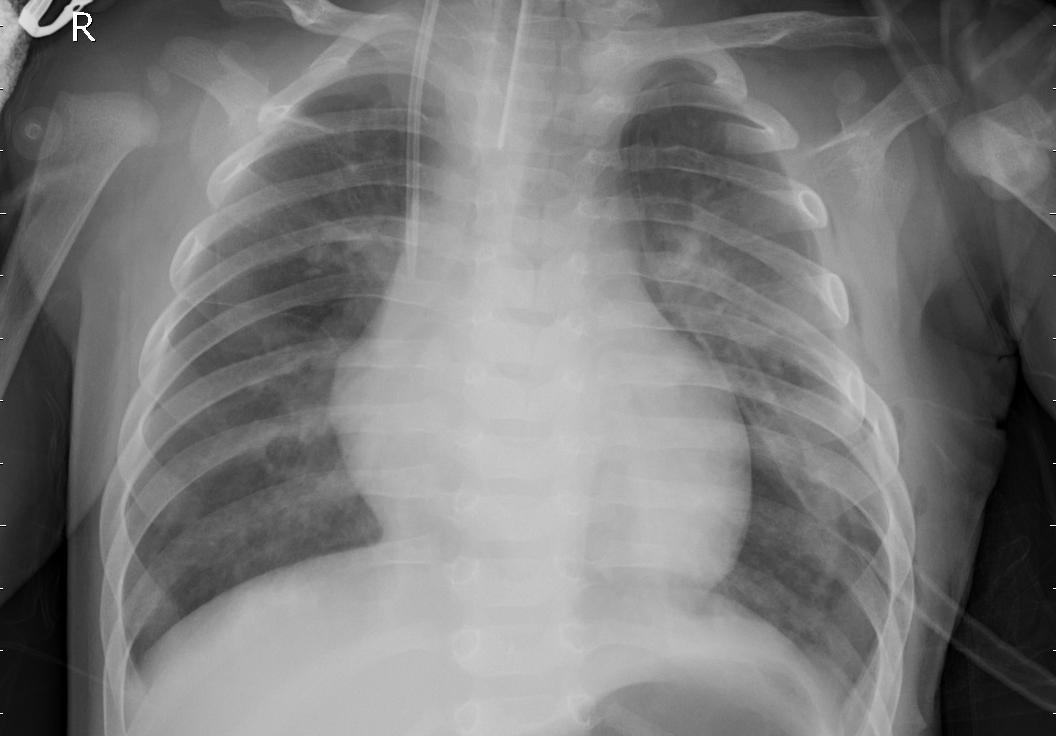

person545_bacteria_2290.jpeg


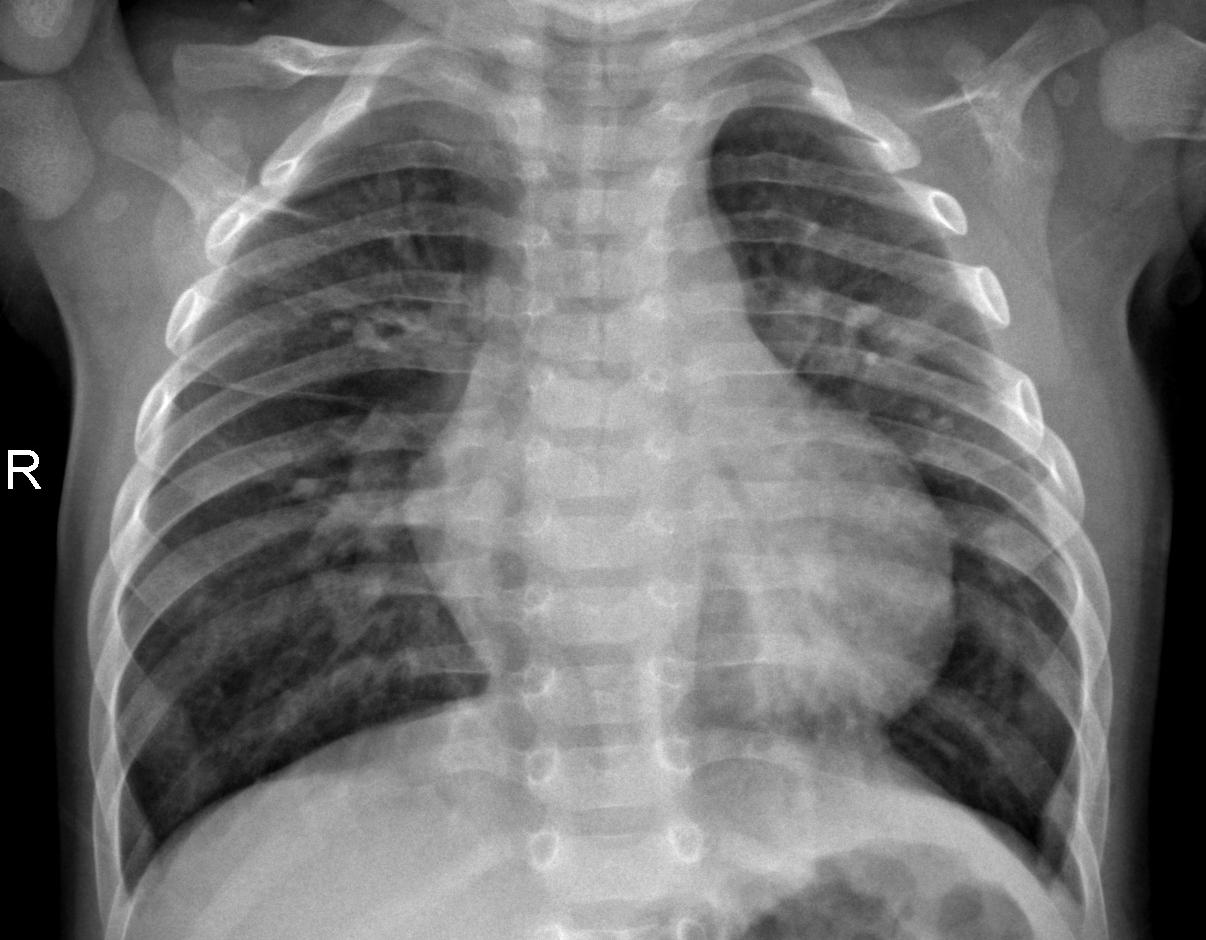

person543_bacteria_2284.jpeg


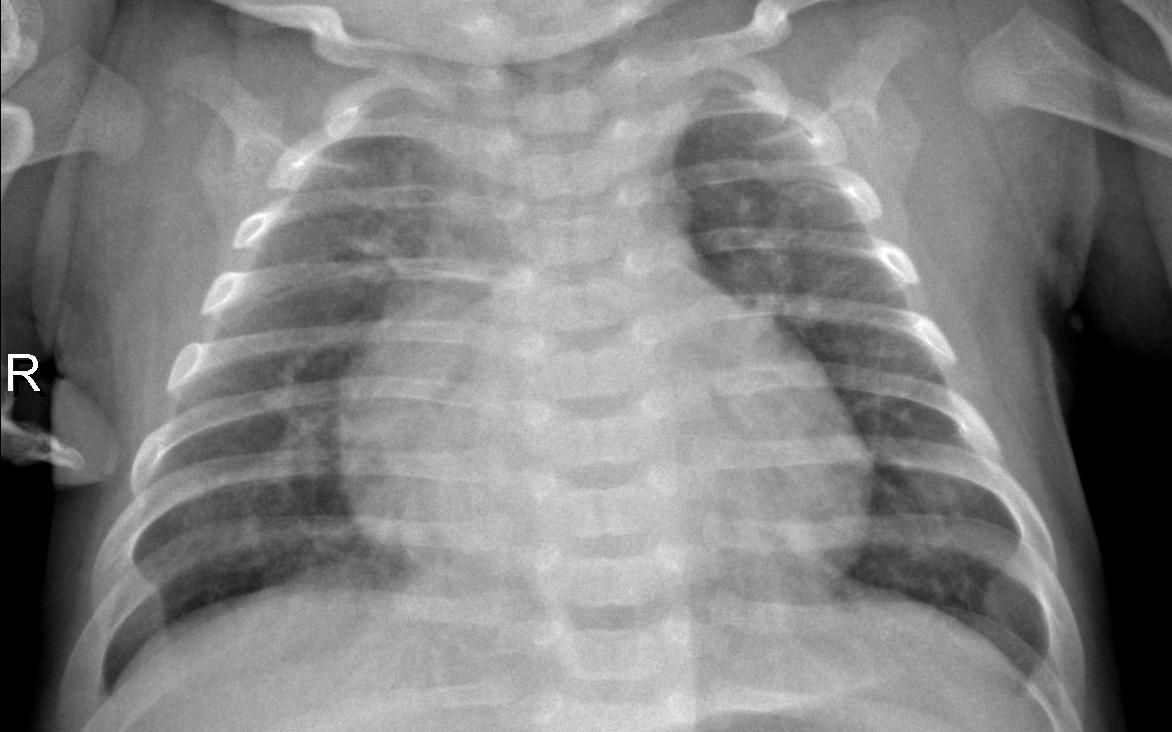

person544_bacteria_2286.jpeg


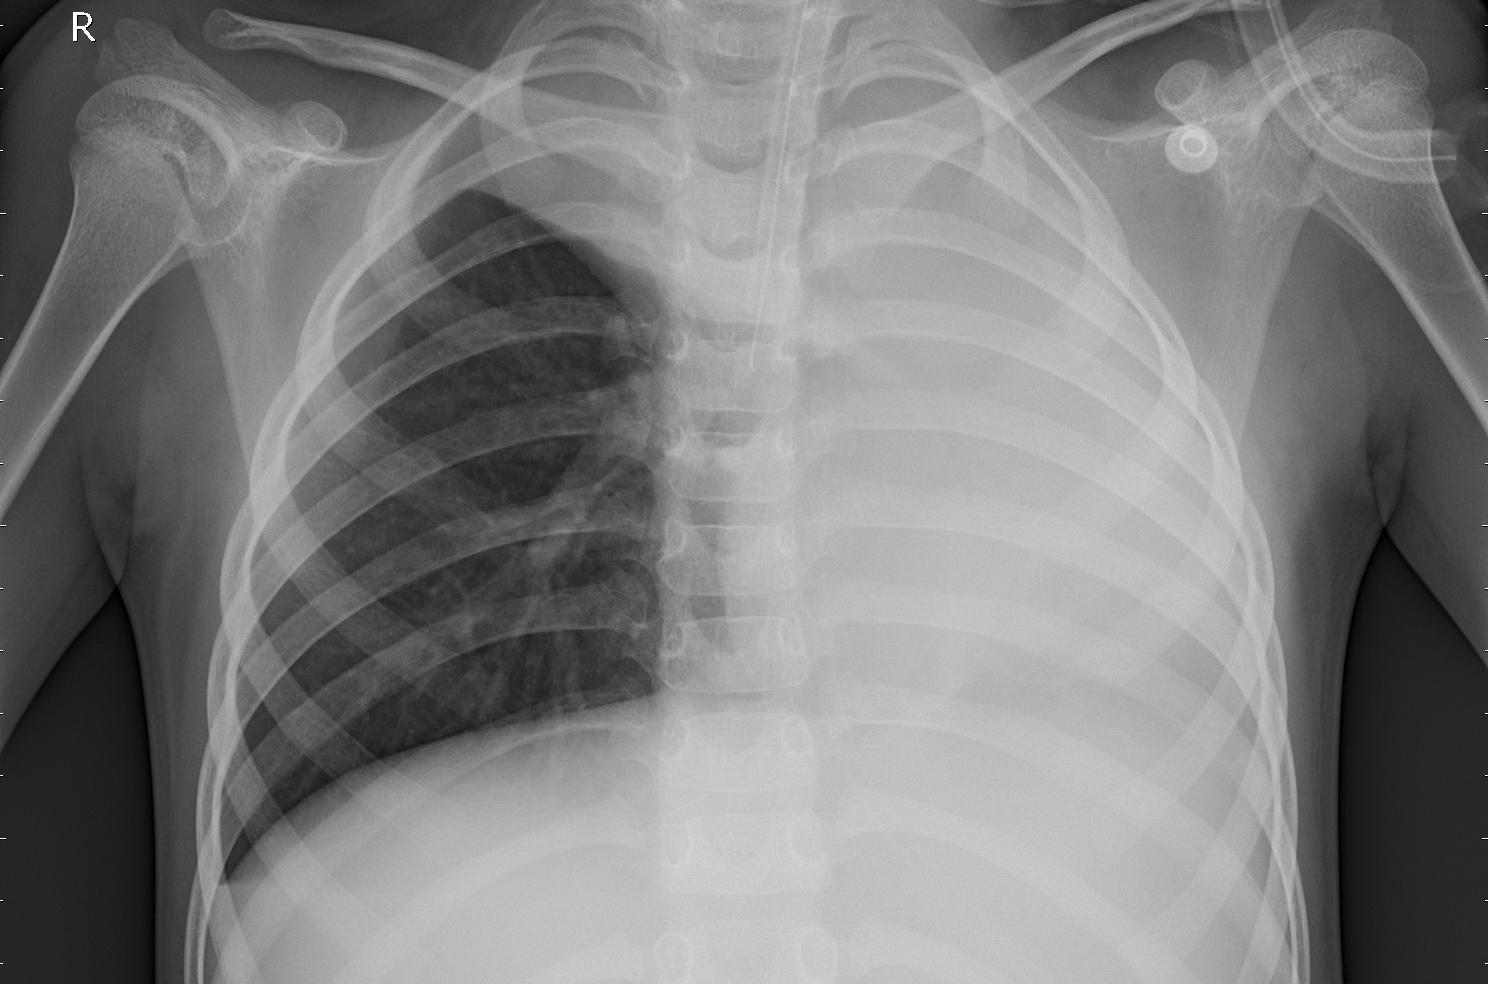

person545_virus_1081.jpeg


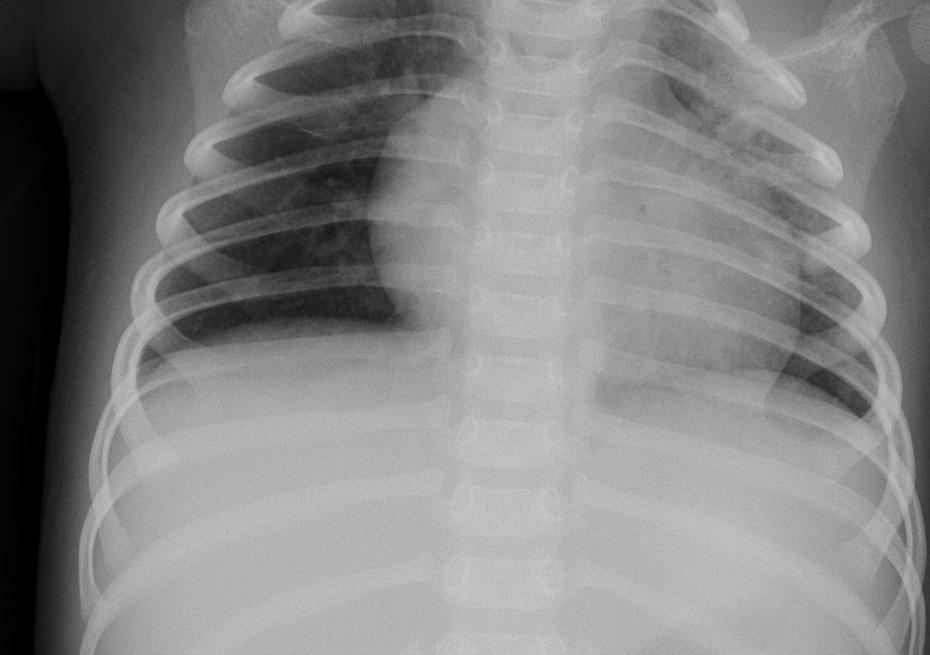

In [ ]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = train_path+'/PNEUMONIA'


onlypneumoniafiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlypneumoniafiles)))
print("Image examples: ")


for i in range(10):
    print(onlypneumoniafiles[i])
    display(_Imgdis(filename=folder + "/" + onlypneumoniafiles[i], width=240, height=240))

In [ ]:
ef = EfficientNetB7(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
ef.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [ ]:
for layer in ef.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/xray1/chest_xray/train/*')
print(len(folders))

2


In [ ]:
x = Flatten()(ef.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=ef.input, outputs=prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_1[0][0]'

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5224 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 626 images belonging to 2 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=5,
  validation_steps=8,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

<ipython-input-39-3ac6f404acaf>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/5

Epoch 1: val_loss improved from inf to 2.40476, saving model to mymodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 - 417s - loss: 2.8434 - accuracy: 0.7125 - val_loss: 2.4048 - val_accuracy: 0.7148 - 417s/epoch - 83s/step
Epoch 2/5

Epoch 2: val_loss did not improve from 2.40476
5/5 - 314s - loss: 2.0613 - accuracy: 0.7563 - val_loss: 3.9678 - val_accuracy: 0.6875 - 314s/epoch - 63s/step
Epoch 3/5

Epoch 3: val_loss did not improve from 2.40476
5/5 - 319s - loss: 1.1941 - accuracy: 0.8750 - val_loss: 6.1522 - val_accuracy: 0.6641 - 319s/epoch - 64s/step
Epoch 4/5

Epoch 4: val_loss improved from 2.40476 to 1.97791, saving model to mymodel.h5
5/5 - 294s - loss: 1.6029 - accuracy: 0.8562 - val_loss: 1.9779 - val_accuracy: 0.7461 - 294s/epoch - 59s/step
Epoch 5/5

Epoch 5: val_loss improved from 1.97791 to 1.16795, saving model to mymodel.h5
5/5 - 278s - loss: 1.7392 - accuracy: 0.8382 - val_loss: 1.1680 - val_accuracy: 0.8438 - 278s/epoch - 56s/step
Training completed in time:  0:27:05.054509


In [ ]:


# Load and preprocess the image
img_path = "/content/drive/MyDrive/xray1/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg" # Replace with an actual image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array) # Assuming 'preprocess_input' is defined elsewhere

# Make the prediction
prediction = model.predict(img_array)

print(prediction)

1/1 [==============================] - 9s 9s/step
[[1.000000e+00 6.588518e-11]]


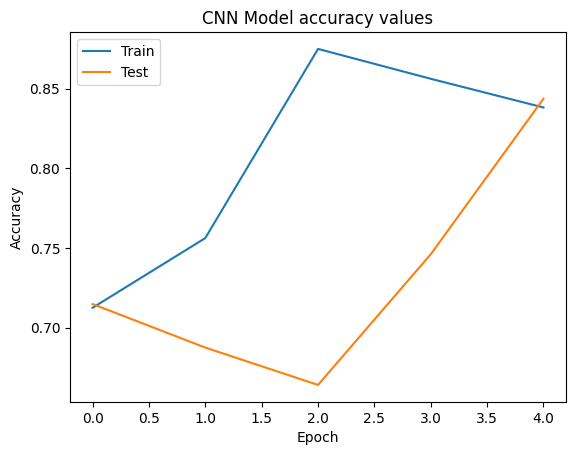

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

save_folder = '/content/drive/MyDrive/resultModel'  # Replace with your actual folder
model_filename = 'model4.h5'  # Choose a filename for your model
save_path = os.path.join(save_folder, model_filename)

import os  # Import the 'os' module for path manipulation

# ... (your model training code) ...

model.save(save_path)
print(f"Model saved to: {save_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to: /content/drive/MyDrive/resultModel/model4.h5


In [ ]:
y_true = []
for i in range(len(test_set)):
    batch_labels = test_set[i][1]  # Extract labels from the batch
    y_true.extend(np.argmax(batch_labels, axis=1))  # Convert one-hot to class indices

# Now you have 'y_true' as a list of integer class labels

y_pred = model.predict(test_set)  # Get predictions for your test set
y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels


20/20 [==============================] - 437s 21s/step


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

f1 = f1_score(y_true, y_pred, average='weighted')  # Calculate weighted F1 score
print("F1 Score:", f1)

acc = accuracy_score(y_true, y_pred)  # Calculate weighted F1 score
print("Accuracy Score:", acc)

conf = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf)

F1 Score: 0.8297845981566092
Accuracy Score: 0.8322683706070287
Confusion Matrix:
[[169  67]
 [ 38 352]]
